In [ ]:

#Install Java Development kit for Spark
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei
  fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-

In [ ]:
import os

In [ ]:
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
!pwd

/content


In [ ]:

!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [ ]:

#Install PySpark with latest version
!pip install pyspark==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 20.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044160 sha256=69c43eea4e0053ead35d04e81cad9e0c71666861135cba9e4482f9a45b44c56d
  Stored in directory: /root/.cache/pip/wheels/b1/bb/8b/ca24d3f756f2ed967225b0871898869db676eb5846df5adc56
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:

#mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Create object of spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-cardio').getOrCreate()


In [ ]:
df=spark.read.csv('/content/drive/MyDrive/Colab Dataset/cardio_train.csv',inferSchema=True,header=True)


In [ ]:

#Check dimension's
print((df.count(),len(df.columns)))


(70000, 13)


In [ ]:
#Check for the schema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [ ]:

#Top 5 records
df.show(5)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



In [ ]:

#Datatypes of the columns
df.dtypes


[('id', 'int'),
 ('age', 'int'),
 ('gender', 'int'),
 ('height', 'int'),
 ('weight', 'double'),
 ('ap_hi', 'int'),
 ('ap_lo', 'int'),
 ('cholesterol', 'int'),
 ('gluc', 'int'),
 ('smoke', 'int'),
 ('alco', 'int'),
 ('active', 'int'),
 ('cardio', 'int')]

In [ ]:
df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|summary|                id|               age|             gender|            height|            weight|            ap_hi|             ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|            cardio|
+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|  count|             70000|             70000|              70000|             70000|             70000|            70000|             70000|             70000|             70000|              70000|               70000

In [ ]:

from pyspark.sql.functions import col
# Filter out rows with non-n/gative ap_hi and ap_lo values
filtered_df = df.filter((col("ap_hi") >= 60) & (col("ap_lo") >= 30))

# Show the top 5 records of the filtered DataFrame
filtered_df.show(5)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



In [ ]:
filtered_df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+
|summary|                id|               age|             gender|            height|            weight|             ap_hi|            ap_lo|       cholesterol|              gluc|              smoke|               alco|            active|             cardio|
+-------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+
|  count|             69764|             69764|              69764|             69764|             69764|             69764|            69764|             69764|             69764|              69764|              69764|

In [ ]:
# Further filter the data for ap_hi and ap_lo values
filtered_df = filtered_df.filter((col("ap_hi") >= 60) & (col("ap_hi") <= 250) & (col("ap_lo") >= 30) & (col("ap_lo") <= 200))

# Show the top 5 records of the filtered DataFrame
filtered_df.show(5)


+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows



In [ ]:
filtered_df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+
|summary|                id|               age|            gender|            height|            weight|             ap_hi|            ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|             cardio|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+
|  count|             68781|             68781|             68781|             68781|             68781|             68781|            68781|             68781|             68781|              68781|               68781|

In [ ]:

#Drop unwanted columns
my_data = filtered_df
my_data.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [ ]:

cols = filtered_df.columns

In [ ]:
cols

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler


In [ ]:

# Select the relevant numerical columns for correlation analysis
numerical_columns = ["age", "height", "weight", "ap_hi", "ap_lo"]

# Create a VectorAssembler to assemble the selected columns into a vector
Corr_assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
Corr_assembled_df = Corr_assembler.transform(filtered_df)

# Calculate the correlation matrix
corr_matrix = Correlation.corr(Corr_assembled_df, "features").head()

# Extract the correlation matrix as a DenseMatrix
corr_matrix = corr_matrix[0].toArray()

# Display the correlation matrix
for row in corr_matrix:
    print(row)




[ 1.         -0.08147023  0.05463058  0.2084903   0.15246297]
[-0.08147023  1.          0.2918194   0.01840376  0.03521253]
[0.05463058 0.2918194  1.         0.26917832 0.24862033]
[0.2084903  0.01840376 0.26917832 1.         0.69694463]
[0.15246297 0.03521253 0.24862033 0.69694463 1.        ]


In [ ]:
# import sql function pyspark
import pyspark.sql.functions as f

# null values in each column
data_agg = my_data.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in my_data.columns])
data_agg.show()


+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [ ]:

# value counts of columns
my_data.groupBy('cholesterol').count().show()
print()
my_data.groupBy('gender').count().show()
print()
my_data.groupBy('smoke').count().show()
print()
my_data.groupBy('alco').count().show()
print()
my_data.groupBy('active').count().show()
print()


+-----------+-----+
|cholesterol|count|
+-----------+-----+
|          1|51581|
|          3| 7886|
|          2| 9314|
+-----------+-----+


+------+-----+
|gender|count|
+------+-----+
|     1|44795|
|     2|23986|
+------+-----+


+-----+-----+
|smoke|count|
+-----+-----+
|    1| 6053|
|    0|62728|
+-----+-----+


+----+-----+
|alco|count|
+----+-----+
|   1| 3689|
|   0|65092|
+----+-----+


+------+-----+
|active|count|
+------+-----+
|     1|55257|
|     0|13524|
+------+-----+




In [ ]:

my_data.dtypes

[('id', 'int'),
 ('age', 'int'),
 ('gender', 'int'),
 ('height', 'int'),
 ('weight', 'double'),
 ('ap_hi', 'int'),
 ('ap_lo', 'int'),
 ('cholesterol', 'int'),
 ('gluc', 'int'),
 ('smoke', 'int'),
 ('alco', 'int'),
 ('active', 'int'),
 ('cardio', 'int')]

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [ ]:
# my_data = my_data.withColumnRenamed('cardio', 'label')


In [ ]:

# cols = my_data.columns

In [ ]:
stages=[]

label_stringIdx = StringIndexer(inputCol = 'cardio', outputCol = 'label')
stages += [label_stringIdx]
# specify the input and output columns of the vector assembler
assembler = VectorAssembler(inputCols=['age',
                                       'gender',
                                       'height',
                                       'weight',
                                       'ap_hi',
                                       'ap_lo',
                                       'cholesterol',
                                       'gluc',
                                       'smoke',
                                       'alco',
                                       'active',
                                      ],
                           outputCol='features')

# fill the null values
# my_data = my_data.fillna(0)
stages += [assembler]
# transform the data
# final_data = assembler.transform(my_data)

In [ ]:

from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(my_data)
my_data = pipelineModel.transform(my_data)
selectedCols = ['label', 'features'] + cols
my_data = my_data.select(selectedCols)
my_data.printSchema()


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [ ]:

my_data.toPandas().head(5)

,label,features,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.0,"[18393.0, 2.0, 168.0, 62.0, 110.0, 80.0, 1.0, ...",0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1.0,"[20228.0, 1.0, 156.0, 85.0, 140.0, 90.0, 3.0, ...",1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,1.0,"[18857.0, 1.0, 165.0, 64.0, 130.0, 70.0, 3.0, ...",2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,1.0,"[17623.0, 2.0, 169.0, 82.0, 150.0, 100.0, 1.0,...",3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,0.0,"[17474.0, 1.0, 156.0, 56.0, 100.0, 60.0, 1.0, ...",4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
train_df, test_df = my_data.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))


Training Dataset Count: 48144
Test Dataset Count: 20637


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=300)
lrModel = lr.fit(train_df)


In [ ]:
lr_summary=lrModel.summary

In [ ]:

#Overall accuracy of the classification model
lr_summary.accuracy

0.7258433034230641

In [ ]:
#Area under ROC
lr_summary.areaUnderROC

0.7902484695101493

In [ ]:

#Precision of both classes
print(lr_summary.precisionByLabel)

[0.7058388492400991, 0.75148097246576]


In [ ]:

#Recall of both classes
print(lr_summary.recallByLabel)

[0.7844813414433668, 0.665924743826642]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

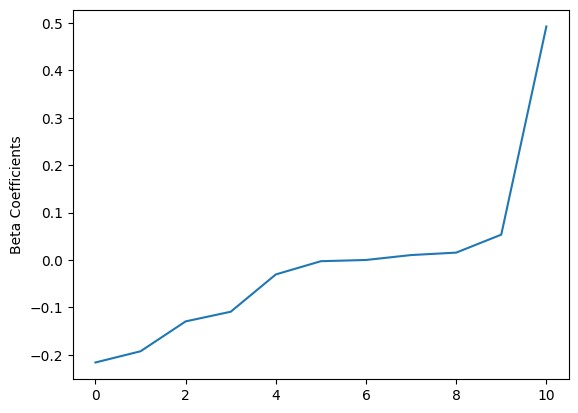

In [ ]:
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()


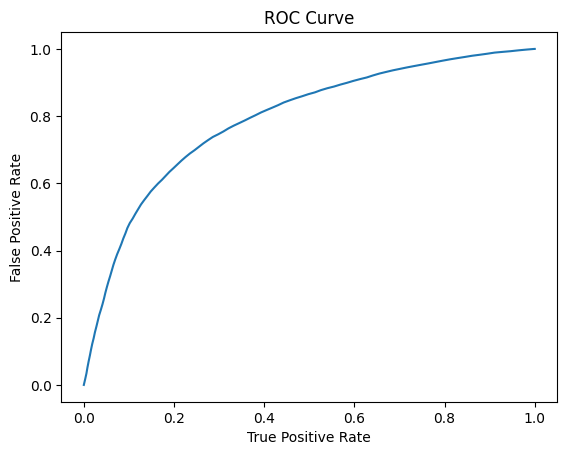

Training set areaUnderROC: 0.7902484695101493


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

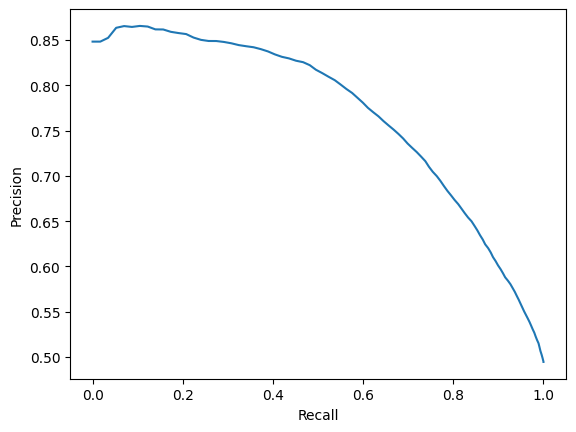

In [ ]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test_df)
predictions.select('label','rawPrediction','probability','prediction').toPandas().head(20)


,label,rawPrediction,probability,prediction
0,0.0,"[3.0090103117883995, -3.0090103117883995]","[0.952979526715982, 0.04702047328401806]",0.0
1,0.0,"[2.287981334065414, -2.287981334065414]","[0.9078767547641419, 0.09212324523585813]",0.0
2,0.0,"[0.5782609829051903, -0.5782609829051903]","[0.6406671604372269, 0.359332839562773]",0.0
3,0.0,"[2.1494258932958346, -2.1494258932958346]","[0.8956151165924031, 0.10438488340759684]",0.0
4,0.0,"[2.793207990657036, -2.793207990657036]","[0.9423076912864403, 0.057692308713559806]",0.0
5,0.0,"[0.012732504557879665, -0.012732504557879665]","[0.5031830831370157, 0.49681691686298435]",0.0
6,0.0,"[3.496923309543675, -3.496923309543675]","[0.9706001012133834, 0.02939989878661676]",0.0
7,0.0,"[2.6002254736317933, -2.6002254736317933]","[0.9308760893464567, 0.06912391065354334]",0.0
8,0.0,"[0.6265985967930572, -0.6265985967930572]","[0.6517178048446762, 0.34828219515532377]",0.0
9,0.0,"[1.25765090402912, -1.25765090402912]","[0.7786214589454408, 0.22137854105455923]",0.0


In [ ]:
predictions.select('label','prediction').toPandas().head(20)

,label,prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [ ]:
#Evaluate our Logistic Regression model.
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7911804957827138


In [ ]:

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [100, 200, 300])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
print('Test Area Under ROC', evaluator.evaluate(predictions))

KeyboardInterrupt: ignored

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


In [ ]:

evaluator.getMetricName()

'areaUnderROC'

In [ ]:
#Decision Tree Classifier
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 10)
dtModel = dt.fit(train_df)
predictions = dtModel.transform(test_df)
predictions.select('age', 'gender', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

In [ ]:
# Get the decision tree rules
tree_rules = dtModel.toDebugString


In [ ]:
def pretty_print_tree_rules(tree_rules):
    lines = tree_rules.split('\n')
    for line in lines:
        # Indent each line based on the depth of the node
        depth = line.count('|')
        indentation = '  ' * depth
        print(indentation + line)

# Assuming you have the 'tree_rules' string
pretty_print_tree_rules(tree_rules)


In [ ]:

#Evaluate our Random Forest model.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

In [ ]:

# Define the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [4, 8, 16])
             .addGrid(dt.maxBins, [100, 200])
             .build())

# Create a cross-validator
cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=BinaryClassificationEvaluator(), numFolds=5)

# Run cross-validation
cvModel = cv.fit(train_df)

# Make predictions on the test data
predictions = cvModel.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator()
areaUnderROC = evaluator.evaluate(predictions)

print("Decision Tree AUC:", areaUnderROC)

Decision Tree AUC: 0.6665351017081461


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.73
F1 Score: 0.73
Recall: 0.73


In [ ]:

#Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_df)
num_trees = 100  # You can change this to the number of trees you desire

# rf = RandomForestClassifier(featuresCol='features', labelCol='label')
rf = rf.setNumTrees(num_trees)  # Set the number of trees

predictions = rfModel.transform(test_df)
predictions.select('age', 'gender', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+------+-----+--------------------+----------+--------------------+
|  age|gender|label|       rawPrediction|prediction|         probability|
+-----+------+-----+--------------------+----------+--------------------+
|10798|     2|  0.0|[15.3158176244402...|       0.0|[0.76579088122201...|
|14292|     2|  0.0|[15.2704651414291...|       0.0|[0.76352325707145...|
|14295|     1|  0.0|[8.18738240572751...|       1.0|[0.40936912028637...|
|14296|     2|  0.0|[15.3075869173933...|       0.0|[0.76537934586966...|
|14302|     1|  0.0|[15.7832574157316...|       0.0|[0.78916287078658...|
|14305|     2|  0.0|[3.60995787587888...|       1.0|[0.18049789379394...|
|14308|     1|  0.0|[15.7832574157316...|       0.0|[0.78916287078658...|
|14313|     1|  0.0|[15.5782360003043...|       0.0|[0.77891180001521...|
|14314|     2|  0.0|[11.1210124274825...|       0.0|[0.55605062137412...|
|14315|     1|  0.0|[14.7568785864992...|       0.0|[0.73784392932496...|
+-----+------+-----+------------------

In [ ]:
# Get the decision tree rules
tree_rules = rfModel.toDebugString


In [ ]:
def pretty_print_tree_rules(tree_rules):
    lines = tree_rules.split('\n')
    for line in lines:
        # Indent each line based on the depth of the node
        depth = line.count('|')
        indentation = '  ' * depth
        print(indentation + line)

# Assuming you have the 'tree_rules' string
pretty_print_tree_rules(tree_rules)


RandomForestClassificationModel: uid=RandomForestClassifier_0debb113b69e, numTrees=20, numClasses=2, numFeatures=11
  Tree 0 (weight 1.0):
    If (feature 6 <= 1.5)
     If (feature 4 <= 139.5)
      If (feature 8 <= 0.5)
       If (feature 5 <= 73.5)
        If (feature 4 <= 124.5)
         Predict: 0.0
        Else (feature 4 > 124.5)
         Predict: 1.0
       Else (feature 5 > 73.5)
        Predict: 0.0
      Else (feature 8 > 0.5)
       Predict: 0.0
     Else (feature 4 > 139.5)
      If (feature 4 <= 149.5)
       If (feature 0 <= 22422.0)
        Predict: 1.0
       Else (feature 0 > 22422.0)
        If (feature 2 <= 180.5)
         Predict: 1.0
        Else (feature 2 > 180.5)
         Predict: 0.0
      Else (feature 4 > 149.5)
       If (feature 5 <= 69.5)
        If (feature 3 <= 64.75)
         Predict: 1.0
        Else (feature 3 > 64.75)
         Predict: 0.0
       Else (feature 5 > 69.5)
        Predict: 1.0
    Else (feature 6 > 1.5)
     If (feature 4 <= 129.5)
   

In [ ]:
#Evaluate our  model.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7925981821408202


In [ ]:
# Define the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100, 200])
             .addGrid(rf.maxDepth, [4, 8, 16, 32])
             .build())

# Create a cross-validator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=BinaryClassificationEvaluator(), numFolds=5)

# Run cross-validation
cvModel = cv.fit(train_df)

# Make predictions on the test data
predictions = cvModel.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator()
areaUnderROC = evaluator.evaluate(predictions)

print("Random Forest AUC:", areaUnderROC)

Random Forest AUC: 0.7989595132788171


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.73
F1 Score: 0.73
Recall: 0.73


In [ ]:
#Gradient-Boosted Tree Classifier
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=100)
gbtModel = gbt.fit(train_df)
predictions = gbtModel.transform(test_df)
predictions.select('age', 'gender', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+------+-----+--------------------+----------+--------------------+
|  age|gender|label|       rawPrediction|prediction|         probability|
+-----+------+-----+--------------------+----------+--------------------+
|10798|     2|  0.0|[0.63759592759548...|       0.0|[0.78163021236439...|
|14292|     2|  0.0|[0.81672218970708...|       0.0|[0.83664093804153...|
|14295|     1|  0.0|[-0.1558476772635...|       1.0|[0.42270097609109...|
|14296|     2|  0.0|[0.65802033693952...|       0.0|[0.78852222361021...|
|14302|     1|  0.0|[1.50639431768042...|       0.0|[0.95314854221723...|
|14305|     2|  0.0|[-0.8783151887762...|       1.0|[0.14721286369077...|
|14308|     1|  0.0|[1.63108324577149...|       0.0|[0.96310784586181...|
|14313|     1|  0.0|[1.44894227596614...|       0.0|[0.94774176364570...|
|14314|     2|  0.0|[0.39947391666397...|       0.0|[0.68974936749807...|
|14315|     1|  0.0|[1.00822447300201...|       0.0|[0.88251332303608...|
+-----+------+-----+------------------

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
# Evaluate the model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Calculate accuracy
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.7335368512865242


In [ ]:
# Get the decision tree rules
tree_rules = gbtModel.toDebugString


In [ ]:
# def pretty_print_tree_rules(tree_rules):
#     lines = tree_rules.split('\n')
#     for line in lines:
#         # Indent each line based on the depth of the node
#         depth = line.count('|')
#         indentation = '  ' * depth
#         print(indentation + line)

# # Assuming you have the 'tree_rules' string
# pretty_print_tree_rules(tree_rules)


In [ ]:
#Evaluate our Gradient-Boosted Tree Classifier.
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7983923457457427


In [ ]:

print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [ ]:

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [4, 8, 11])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [50, 150])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
evaluator.evaluate(predictions)

0.7359112274070844

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.74
F1 Score: 0.74
Recall: 0.74


In [ ]:

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train_df)
predictions = cvModel.transform(test_df)
evaluator.evaluate(predictions)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# GBTClassifier model evaluation
predictions = cvModel.transform(test_df)

# Define the evaluators
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)

# Calculate accuracy, F1 score, and recall
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))


In [ ]:

#Get Preditions
predictions = log_reg.transform(test_df)

In [ ]:

predictions.select('label','prediction').show(50)

In [ ]:

from pyspark.ml.classification import LinearSVC

# Define the SVM classifier
svm = LinearSVC(featuresCol='features', labelCol='label')

# Create a pipeline with the feature assembler and SVM classifier
pipeline1 = Pipeline(stages=[assembler, svm])

# Define the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(svm.regParam, [0.01, 0.1, 1.0])
             .addGrid(svm.maxIter, [10, 20, 30])
             .build())

# Create a cross-validator
cv = CrossValidator(estimator=pipeline1, estimatorParamMaps=paramGrid, evaluator=BinaryClassificationEvaluator(), numFolds=5)

# Run cross-validation on the training data
cvModel = cv.fit(train_df)

# Make predictions on the test data
predictions = cvModel.transform(test_df)

# Evaluate the model
evaluator = BinaryClassificationEvaluator()
areaUnderROC = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("SVM AUC:", areaUnderROC)

# Additional evaluation metrics if needed
accuracy = evaluator_accuracy.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)

# Print the results
print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Recall: {:.2f}".format(recall))
